### Importing Libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from collections import Counter


### Importing the Data for Data Exploration Project

In [3]:
filepath="employee_attrition.csv"
data=pd.read_csv(filepath,parse_dates=['birthdate_key','recorddate_key','orighiredate_key','terminationdate_key'])
# reading data using pandas


In [4]:
# seeing the shape of the data and what the data looks like.
data.shape


(49653, 18)

In [5]:
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [6]:
data.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,2015-12-01,1994-05-28,2013-08-19,2015-12-30,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,2013-08-01,1994-06-13,2013-08-27,2013-08-30,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,2015-12-01,1994-07-18,2013-09-15,2015-12-30,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,2013-12-01,1994-09-02,2013-10-09,2013-12-31,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,2014-12-01,1994-11-28,2013-11-24,2014-12-30,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   EmployeeID           49653 non-null  int64         
 1   recorddate_key       49653 non-null  datetime64[ns]
 2   birthdate_key        49653 non-null  datetime64[ns]
 3   orighiredate_key     49653 non-null  datetime64[ns]
 4   terminationdate_key  49653 non-null  datetime64[ns]
 5   age                  49653 non-null  int64         
 6   length_of_service    49653 non-null  int64         
 7   city_name            49653 non-null  object        
 8   department_name      49653 non-null  object        
 9   job_title            49653 non-null  object        
 10  store_name           49653 non-null  int64         
 11  gender_short         49653 non-null  object        
 12  gender_full          49653 non-null  object        
 13  termreason_desc      49653 non-


- Data is a mix of string and integer values.

- Some features with strings should be dates. We convert it as it may be obvious in the info. The features are recorddate_key, birthdate_key,
   orighiredate_key, and terminationdate_key.

- EmployeeID is for identification. It shouldn't be used for training the machine learning model, but can be useful for filtering rows.

- The termination date uses 1/1/1900 if the employee is still active.

- The store_name is given as a number, even though it is a nominal categorical feature. The store name itself is unlikely to be cause of employment 

    termination, but particular feature values may be associated with particular stores. It could be an interesting separate investigation.

- Gender is given in short and full. Only one of them is necessary so one will be dropped.

- An employee whose employment is terminated has valid entries for termination date, termination reason and termination type. These 3 features should not 

    be used for training the machine learning model because the features are results, not predictors, of employment termination. They may be interesting as 

    labels, however, if the prediction goal changes.

- The status_year column repeats information in the record date.

- The status column is the label to predict. It should be converted from string to numerical.

- this data talk about Couple of years period of records for each employee 

<hr>

In [8]:
# drop the duplications if exist
data.drop_duplicates(inplace=True)
data

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,2015-12-01,1994-05-28,2013-08-19,2015-12-30,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,2013-08-01,1994-06-13,2013-08-27,2013-08-30,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,2015-12-01,1994-07-18,2013-09-15,2015-12-30,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,2013-12-01,1994-09-02,2013-10-09,2013-12-31,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


# Data Exploration
<hr>

- check outliers

In [9]:
data.describe(percentiles=[0.01,0.25,0.50,0.75,0.99])
# there is no any outliers 

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
1%,1417.000000,20.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
99%,8157.480000,65.000000,24.000000,46.000000,2015.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [10]:
data.drop(['gender_full'],axis=1,inplace=True)

In [11]:
# Summarise the non-numerical data
data.describe(include=['O'])

,city_name,department_name,job_title,gender_short,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
count,49653,49653,49653,49653,49653,49653,49653,49653
unique,40,21,47,2,4,3,2,2
top,Vancouver,Meats,Meat Cutter,F,Not Applicable,Not Applicable,ACTIVE,STORES
freq,11211,10269,9984,25898,48168,48168,48168,49068


```
- the first think i work with is the jon titles there are more than 40 title i will create new categories for job titles
```

In [12]:
# Create new categories for job titles

data.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Compensation Analyst                 20
Corporate Lawyer                     17


In [13]:
#The 47 jobs can be separated according to corporate hierarchy
# Use employee, manager, and combined executives and board 
employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer', 
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance','CEO']

board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

# Check all jobs were entered into the categories
total = len(employee) + len(manager) + len(executive) + len(board)
print('Total jobs categorised:', total, 'out of 47')

Total jobs categorised: 47 out of 47


In [14]:
# funcation to enter data to Hierarchy feature
def Convert_job_title(job):
    if job in board: return 'Board'
    if job in executive: return 'Executive'
    if job in manager: return 'Manager'
    if job in employee: return 'Employee'

data['Hierarchy'] = data['job_title'].map(Convert_job_title)

In [15]:
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,Hierarchy
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,Executive
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,Executive
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,Executive
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,Executive
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,Executive


In [16]:
data.Hierarchy.unique()

array(['Executive', 'Board', 'Employee', 'Manager'], dtype=object)

# Data Visualisation

In [17]:
# set a new figsize to all figure
plt.rcParams['figure.figsize'] = (12, 8)


In [18]:
# check the unique value of the target 
data.STATUS.unique()

array(['ACTIVE', 'TERMINATED'], dtype=object)

In [19]:
#split the data to two datasets one represent the terminated and other for active ones
out_of_co = data[data.STATUS == 'TERMINATED']
in_co = data[data.STATUS == 'ACTIVE']

Text(0.5, 1.0, 'In company')

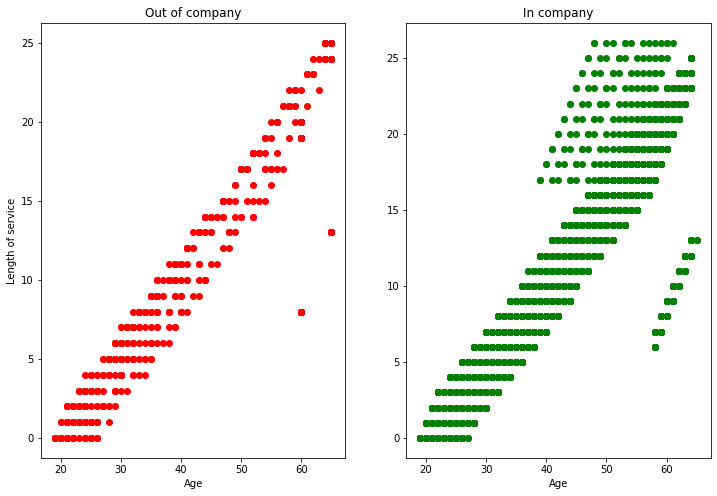

In [20]:
# scatter the two datasets next to each other
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(out_of_co.age, out_of_co.length_of_service, color='r')
ax1.set_xlabel('Age')
ax1.set_ylabel('Length of service')
ax1.set_title('Out of company')

ax2.scatter(in_co.age, in_co.length_of_service, color='g')
ax2.set_xlabel('Age')
ax2.set_title('In company')

C:\Users\zahra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


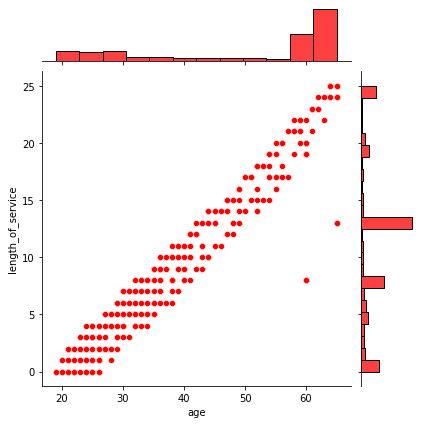

In [21]:
# see by details the out_of_company data 
g = sns.jointplot(out_of_co.age, out_of_co.length_of_service, color='r')


- There appear to be 2 peaks in the age when people stop working. There are 4 major peaks in the length of service before people stop working.

- The largest age peak of above 60 years old overlaps the service peak of 25 years. This would be people who are retiring from the work force.
- The second largest age peak of 20-25 years old overlaps the service peak of 0 years. This is likely people who are trying jobs to find something they would like.

- The largest service peak of around 13 years overlaps with the age peak of above 60 years and with ages between 40-50.

C:\Users\zahra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


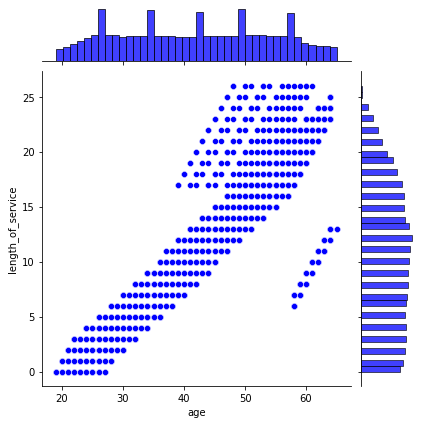

In [22]:
g = sns.jointplot(in_co.age, in_co.length_of_service, color='b')


There appear to be 5 peaks in the age when people stop working. There are nearly a uniform distribution in the length of service expect the 25 year length.

- all the peaks in the age a nearly looks a like and they are at 27 ,34,45,49 and 57

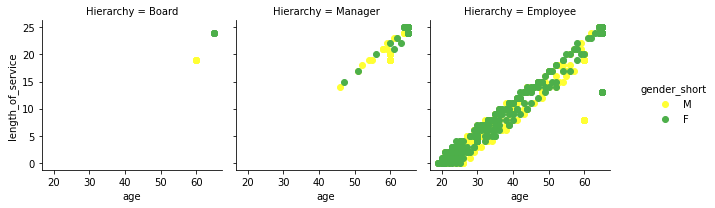

In [23]:
# When someone leaves the company, look at their age, length of service.
# and position in hierarchy. Separated by gender
g = sns.FacetGrid(out_of_co, col='Hierarchy', palette='Set1_r', 
                  hue='gender_short', margin_titles=True) 
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

- Nobody has stopped employment when they were at executive level.
- There does not appear to be a major difference in employment termination between males and females.
- Managers and board members stop employment after at least 14 years of service. This means that they were likely internally promoted to those positions.
- Managers and board members stop employment after at least 40 years old.

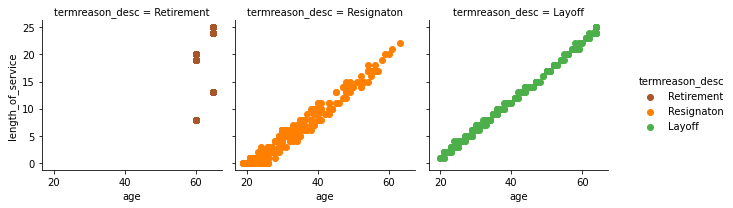

In [24]:
g = sns.FacetGrid(out_of_co, col='termreason_desc', palette='Set1_r', 
                  hue='termreason_desc', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())


- Layoffs occur for all ages and all s|ervice lengths.
- Resignations are at the first 10 years of service after this the Resignations get lower
- the Retirement is after 60 year old to 64 year old 


<AxesSubplot:>

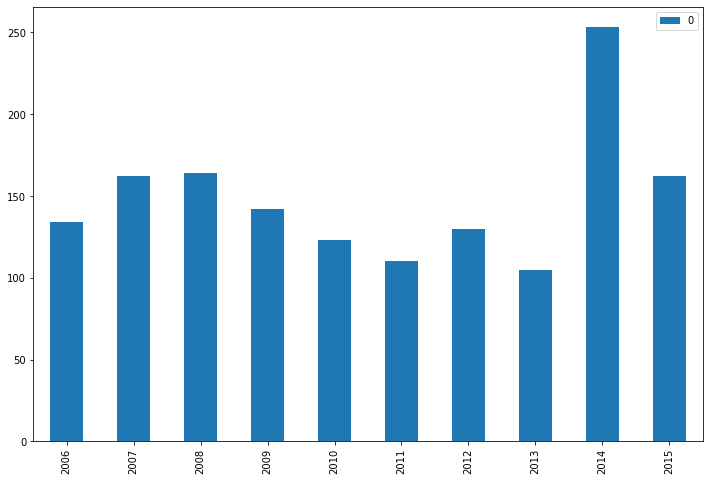

In [25]:
# Out of interest, look at number of terminations per year.
# Count terminations per year
term_per_year = Counter(out_of_co.STATUS_YEAR)
term_per_year_df = pd.DataFrame.from_dict(term_per_year, orient='index')
term_per_year_df = term_per_year_df.sort_index()
term_per_year_df.plot(kind='bar')

- 2014 had an unusually high number of employment terminations.
- There was a peak in employment terminations in 2007-2008.
- There is another peak in 2012.
- Employment terminations in 2015 is similar to the employment terminations in 2007-2008 but much lower than the 2014 peak.

<AxesSubplot:xlabel='STATUS_YEAR', ylabel='count'>

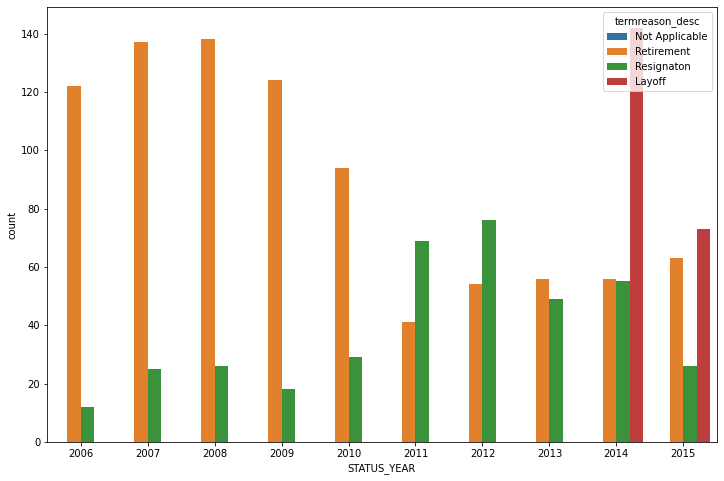

In [26]:
sns.countplot(x=out_of_co.STATUS_YEAR,hue=data['termreason_desc'])

- the layoff start at the last two years 
- Retirements peak were at 2007-2008 and lowest Retirements were at 2011 
- Resignatons peak were at 2011-2012 and were very low at 2006
- with the years flow the Retirements are getting lower where the Resignatons are getting higher 

<AxesSubplot:xlabel='STATUS_YEAR', ylabel='count'>

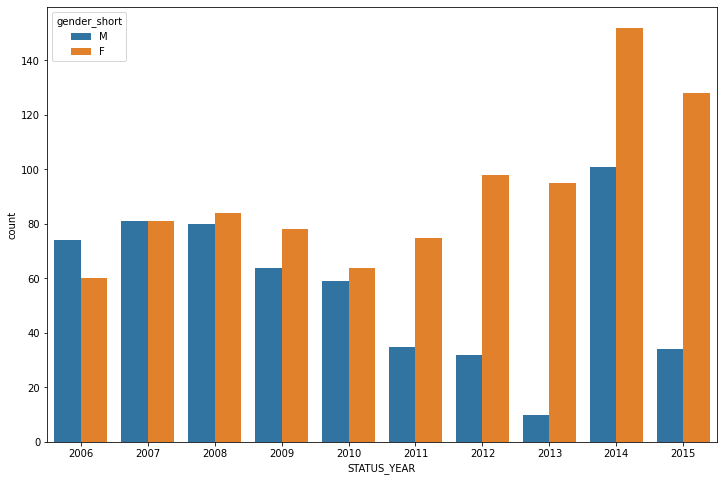

In [27]:
plt.figure( figsize=(12,8))
sns.countplot(x=out_of_co.STATUS_YEAR,hue=data['gender_short'])

- untill 2010 the ratio between females and males who get terminated is nearly equal 
- after 2010 the females are get terminated more and more and this is obvise in the last 4 years 

<AxesSubplot:xlabel='STATUS_YEAR', ylabel='count'>

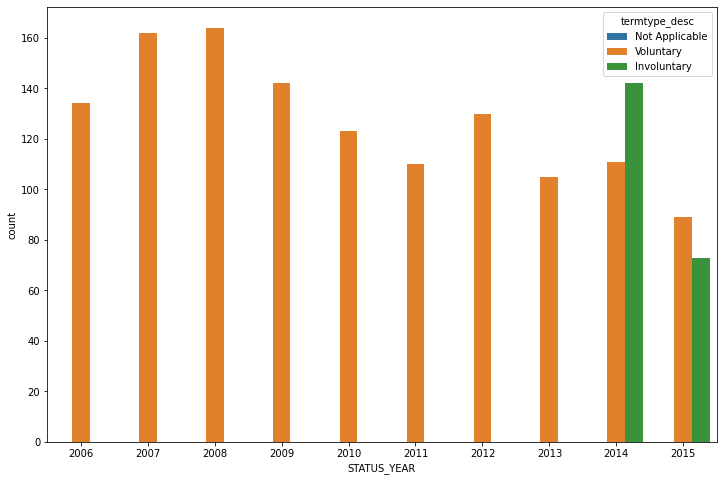

In [28]:

sns.countplot(x=out_of_co.STATUS_YEAR,hue=data['termtype_desc'])

- As expected, layoffs are involuntary, whereas resignations and retirements are voluntary.

<AxesSubplot:xlabel='BUSINESS_UNIT', ylabel='count'>

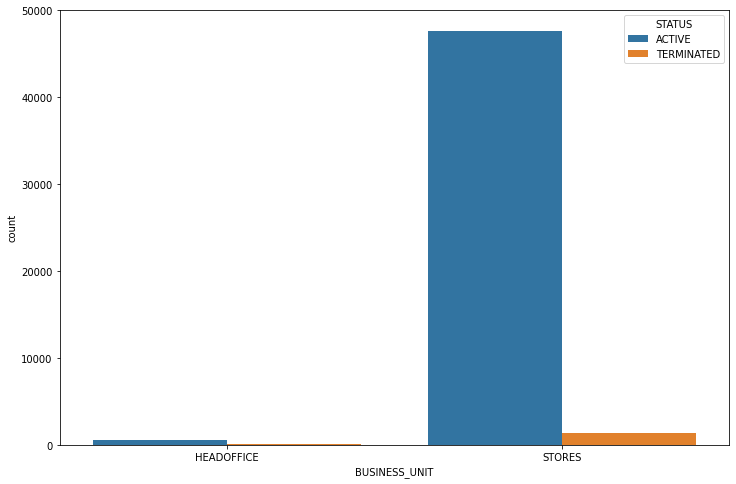

In [29]:

sns.countplot(x=data.BUSINESS_UNIT,hue=data['STATUS'],alpha =1)

- As expected, Stores has way more employees than the Head office and that what make termantions is higher there 

<AxesSubplot:xlabel='Hierarchy', ylabel='count'>

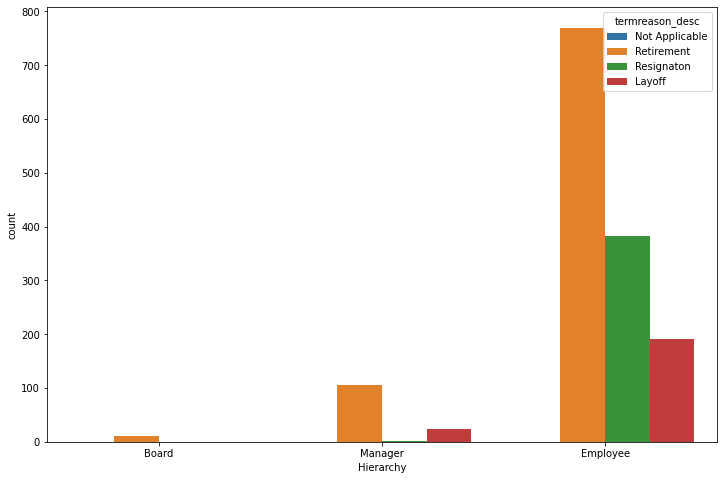

In [30]:
sns.countplot(x=out_of_co.Hierarchy,hue=data['termreason_desc'],alpha = 1)

- another plot to ptoof the last idea and show that all the Resignaton was in the Employee 

- mangers Retire or layoff board only Retire

In [31]:
out_of_co_of_employee = out_of_co[out_of_co.Hierarchy == 'Employee']

<AxesSubplot:xlabel='department_name', ylabel='count'>

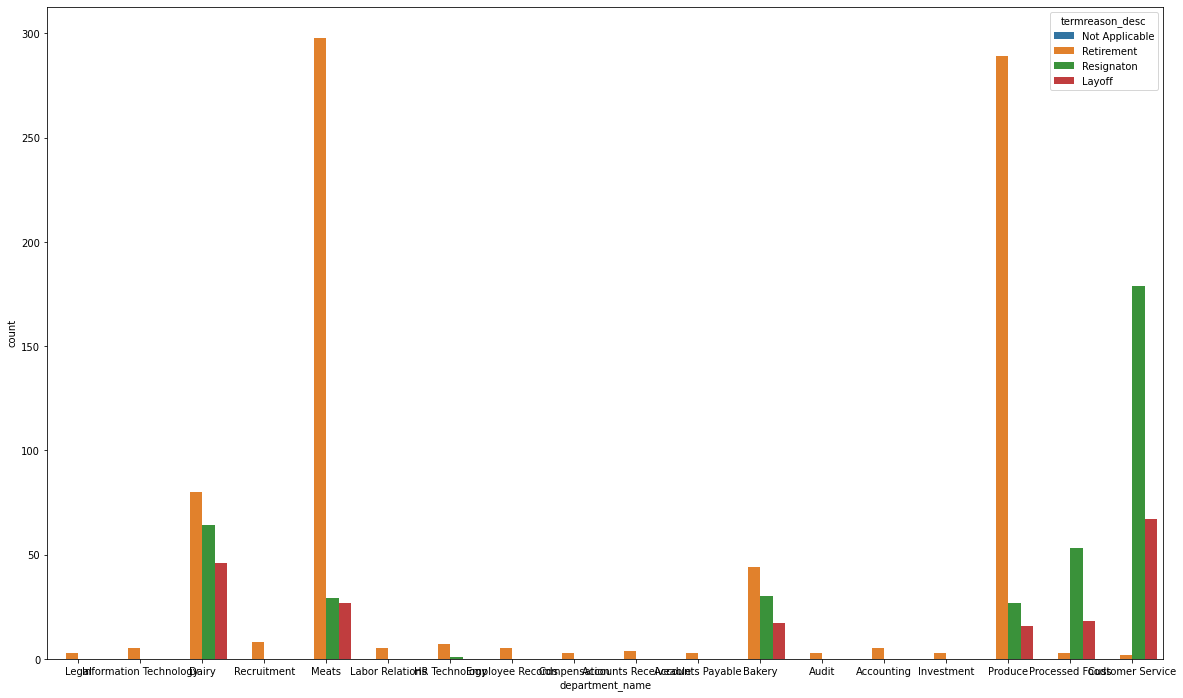

In [43]:
plt.figure( figsize=(20,12))
sns.countplot(x=out_of_co_of_employee.department_name,hue=data['termreason_desc'])

##### there are 4 peaks of retirement ,6 peaks of layoff and 6 peaks of Resignaton
- the retirement peaks are :
    1. Dairy
    2. Meats
    3. Bakery
    4. Product
- the layoff peaks are :
    1. Dairy
    2. Meats
    3. Bakery
    4. Product
    5. Processed Food
    6. Customer service
- the Resignaton peaks are :
    1. Dairy
    2. Meats
    3. Bakery
    4. Product
    5. Processed Food
    6. Customer service
##### there are 4 peaks in all of them (Dairy,Meats,Bakery and Product) the worst departments 

In [56]:
max(out_of_co['store_name'].unique())
# to know the exact number of stores 

46

Text(0.5, 1.0, 'store_name')

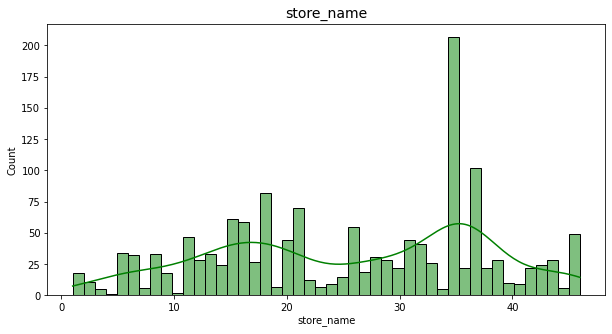

In [57]:

plt.figure(figsize=(10, 5))
sns.histplot(out_of_co['store_name'], color = 'g', label = 'terminated',  kde = True,bins=46)
plt.title('store_name', size = 14)

- the largest store in terminations is store number: 35
-there are other peaks like store (37,46,26 and 18) but the largest is 35.-that does not mean that this store is bad or anything.